## Decision Tree for Predictive Modeling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/shopping_trends.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
corr_matrix = data.corr()
print(corr_matrix)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


C:\Users\2001s\AppData\Local\Temp\ipykernel_8324\2599440078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [5]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

<Axes: xlabel='Frequency of Purchases', ylabel='count'>

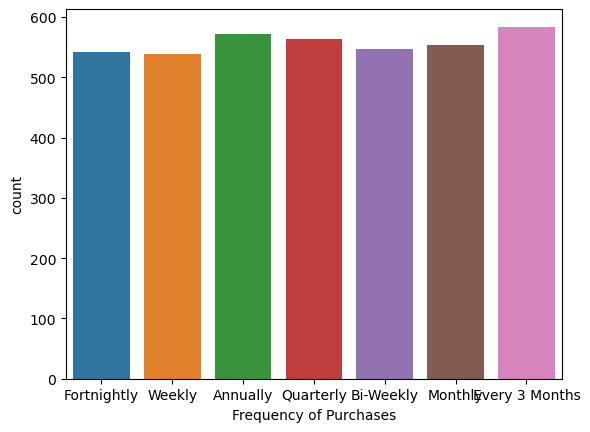

In [6]:
sns.countplot(x='Frequency of Purchases', data=data)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Item Purchased'] = le.fit_transform(data['Item Purchased'])
data['Previous Purchases'] = le.fit_transform(data['Previous Purchases'])
data['Category'] = le.fit_transform(data['Category'])
data['Season'] = le.fit_transform(data['Season'])
data['Frequency of Purchases'] = le.fit_transform(data['Frequency of Purchases'])


In [8]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,Kentucky,L,Gray,3,3.1,Yes,Credit Card,Express,Yes,Yes,13,Venmo,3
1,2,19,1,23,1,64,Maine,L,Maroon,3,3.1,Yes,Bank Transfer,Express,Yes,Yes,1,Cash,3
2,3,50,1,11,1,73,Massachusetts,S,Maroon,1,3.1,Yes,Cash,Free Shipping,Yes,Yes,22,Credit Card,6
3,4,21,1,14,2,90,Rhode Island,M,Maroon,1,3.5,Yes,PayPal,Next Day Air,Yes,Yes,48,PayPal,6
4,5,45,1,2,1,49,Oregon,M,Turquoise,1,2.7,Yes,Cash,Free Shipping,Yes,Yes,30,PayPal,0


In [9]:
x = data[['Age','Gender','Item Purchased','Category','Previous Purchases','Season','Review Rating']]
y = data['Frequency of Purchases']

In [10]:
from sklearn.model_selection import train_test_split
# spliting train and test dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state = 2)

In [11]:
# Linear SVM

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [2.87422303 3.0271524  3.04973163 3.06579903 2.97206497 3.04483
 3.01866388 2.9512451  3.0307541  3.05774281 2.92082559 3.13336553
 2.93584051 2.98897309 3.074539   3.11206711 3.0124698  3.04194693
 2.9433801  2.90854884 2.95024615 3.0524374  3.04255197 3.01020822
 3.00690189 3.07795047 3.04607918 2.95296304 3.07334549 2.93851395
 2.94312748 3.05407564 3.02965677 3.11651471 3.06464882 2.90778957
 3.09987048 2.95637435 2.96655562 2.94623788 2.97147267 2.96703692
 2.96739358 2.91794836 3.09200882 3.00518686 2.98682775 3.10894556
 2.97195735 3.06457757 3.03310978 2.99067689 3.10009818 2.8874284
 2.94332461 2.87640579 3.09392248 2.98199056 3.0075074  3.0895093
 2.88858245 3.0174382  2.847697   2.93850364 3.04825264 2.92334723
 3.05791219 2.93764299 2.85307344 3.06058013 2.90660542

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(xtrain,ytrain)

print('Hyperparameter:\n',dt_reg.get_params())
print()

ypred = dt_reg.predict(xtest)

print('Predicted class labels for the test samples:\n',ypred)
print()

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# performance metric

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class labels for the test samples:
 [0. 4. 5. 6. 2. 5. 2. 4. 2. 5. 1. 5. 1. 5. 0. 3. 4. 1. 6. 0. 3. 3. 4. 0.
 5. 6. 0. 6. 3. 5. 5. 5. 2. 5. 5. 6. 1. 0. 2. 4. 1. 6. 6. 3. 0. 2. 0. 0.
 0. 0. 3. 0. 5. 3. 1. 6. 1. 5. 2. 5. 1. 4. 2. 4. 2. 3. 5. 6. 5. 2. 1. 2.
 1. 4. 4. 5. 5. 5. 1. 4. 2. 1. 2. 4. 3. 0. 0. 4. 4. 6. 0. 4. 6. 0. 5. 3.
 4. 1. 3. 2. 6. 5. 6. 4. 5. 1. 5. 4. 5. 0. 1. 0. 5. 1. 4. 1. 4. 4. 1. 2.
 0. 3. 4. 1. 4. 0. 5. 5. 2. 5. 3. 0. 3. 4. 5. 5. 4. 5. 2. 3. 3. 0. 2. 5.
 4. 6. 3. 3. 4. 1. 2. 1. 3. 1. 4. 2. 0. 1. 3. 2. 5. 5. 5. 4. 4. 3. 5. 0.
 2. 2. 5. 1. 4. 1. 2. 4. 0. 1. 1. 0. 6. 3. 6. 0. 3. 6. 4. 5. 0. 0. 4. 4.
 6. 1. 1. 1. 6. 5. 1. 0. 1. 2. 2. 6. 3. 2. 0. 2. 4. 6. 0. 1. 6. 2. 0. 1.
 1. 0. 6. 5. 

In [15]:
# Non-Linear SVM

from sklearn.svm import SVR

support_reg=SVR(kernel='rbf')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [2.90801277 3.17281315 3.13985043 3.11450444 3.00358032 2.96152877
 3.06993451 2.92384722 2.9541047  3.11462006 2.98154987 3.05121108
 3.03398092 3.11361592 2.91848563 2.89460214 3.11097846 3.09829095
 2.90489823 3.0198899  3.05553731 3.16220409 3.08648793 2.96085962
 3.10479692 3.16834429 2.90640642 2.87673946 2.97374751 2.78635471
 3.05003697 3.2169279  2.94400368 3.05357308 2.98831304 2.9059632
 3.02167733 3.13624166 3.13849284 2.99648306 2.92263965 2.99980774
 2.80472428 3.08355333 3.14319074 2.98405963 3.05529648 3.14148053
 3.01840276 2.93933519 2.95276123 2.7362594  3.1726938  2.9071504
 3.09730151 2.60011153 2.92642745 2.91639697 3.07690505 3.13426746
 3.09829739 3.00277521 2.59624526 3.02150165 3.1190758  2.81688751
 3.00704747 2.98016338 2.50721298 3.00225736 2.84684172

In [17]:
from sklearn.svm import SVC

In [25]:
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
# support vector of Kernal Linear model
model.support_vectors_


array([[29. ,  1. , 17. , ..., 39. ,  3. ,  4.1],
       [42. ,  1. ,  3. , ..., 48. ,  2. ,  3.4],
       [62. ,  1. , 11. , ..., 37. ,  3. ,  4. ],
       ...,
       [56. ,  0. , 15. , ..., 16. ,  1. ,  2.8],
       [30. ,  1. ,  0. , ..., 41. ,  0. ,  4.7],
       [37. ,  0. ,  8. , ...,  8. ,  3. ,  3.2]])

In [32]:
model=SVC(kernel='rbf')
model.fit(xtrain,ytrain)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
# support vector of Non-Linear Kernal 'RBF' model
model.support_vectors_


array([[29. ,  1. , 17. , ..., 39. ,  3. ,  4.1],
       [42. ,  1. ,  3. , ..., 48. ,  2. ,  3.4],
       [62. ,  1. , 11. , ..., 37. ,  3. ,  4. ],
       ...,
       [56. ,  0. , 15. , ..., 16. ,  1. ,  2.8],
       [30. ,  1. ,  0. , ..., 41. ,  0. ,  4.7],
       [37. ,  0. ,  8. , ...,  8. ,  3. ,  3.2]])

# 

# 

## Develop an image classification model with SVC

In [36]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


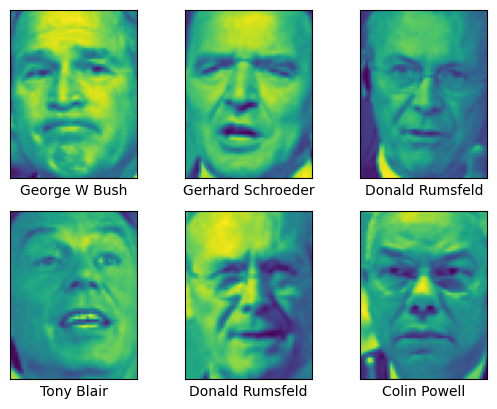

In [38]:
fig,ax=plt.subplots(2,3)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (855, 2914)

Training data-y- Shape:	 (855,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (285, 2914)

Testing data(y-Outcome) Shape:	 (285,)


In [44]:
#Model parameter configuration
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)
#train the model
from sklearn.model_selection import GridSearchCV # to get optimum parameter
param_grid={'svc__C':[1,5,10,20,50],
 'svc__gamma':[0.0001,0.0005,0.001,0.005]
 }
grid=GridSearchCV(pipe_model,param_grid)
%time grid.fit(xtrain,ytrain)
print(grid.best_params_)

CPU times: total: 1min 5s
Wall time: 33.3 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [45]:
model=grid.best_estimator_
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [46]:
#Test the model
yfit=model.predict(xtest)
yfit

array([0, 0, 2, 3, 2, 0, 0, 4, 2, 2, 4, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2,
       1, 4, 2, 3, 4, 2, 2, 1, 3, 1, 1, 0, 0, 0, 2, 0, 3, 4, 2, 2, 2, 2,
       0, 4, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 3,
       3, 2, 0, 2, 4, 2, 1, 3, 2, 2, 2, 4, 2, 2, 0, 2, 2, 2, 3, 2, 2, 3,
       0, 1, 2, 2, 2, 4, 2, 0, 2, 0, 2, 3, 2, 3, 2, 4, 2, 1, 2, 1, 2, 2,
       3, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 3, 1, 2, 4, 2, 4,
       0, 0, 4, 2, 3, 4, 0, 3, 2, 0, 2, 1, 1, 0, 3, 2, 2, 2, 0, 2, 2, 4,
       2, 3, 4, 0, 0, 4, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 2, 4, 4, 0, 4, 2, 4, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 3, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 4, 0, 2, 1, 2, 2, 2, 2,
       2, 3, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 2, 0, 2, 2, 1, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 3, 0, 0, 2, 3, 1, 2, 0, 0, 3, 2, 2, 1,
       4, 2, 1, 0, 4, 3, 4, 3, 2, 0, 0, 1, 4, 1, 0, 3, 2, 0, 2, 1, 4],
      dtype=int64)

In [51]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('='*80)
print('Accuracy Score:\n',accuracy_score(ytest,yfit))
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,yfit))
print('-'*80)
print('Classification Report:\n',classification_report(ytest,yfit,target_names=faces.target_names))
print('='*80)

Accuracy Score:
 0.9087719298245615
Confusion Matrix:
 [[ 61   1   2   0   0]
 [  2  27   1   0   2]
 [  6   2 118   1   0]
 [  2   0   2  24   1]
 [  0   1   1   2  29]]
--------------------------------------------------------------------------------
Classification Report:
                    precision    recall  f1-score   support

     Colin Powell       0.86      0.95      0.90        64
  Donald Rumsfeld       0.87      0.84      0.86        32
    George W Bush       0.95      0.93      0.94       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.91       285
        macro avg       0.90      0.89      0.89       285
     weighted avg       0.91      0.91      0.91       285

